<a href="https://colab.research.google.com/github/Codeguy225/Project-2/blob/main/Derek_Overton_Project_Two_Part_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income**

**Name:** **Derek Overton**

**Date:** **1/25/2023**

**Assignment:** **Project 2 Part 3**

# **Assignment Part 2:**
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
I- dentified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

#**Assignment Part 3:**

**Note: You are not clustering your data for this assignment.**
- For this part of the project, you will continue your data exploration by:
 - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
 - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

Please submit the link to your GitHub Repository.

##**Peliminary**

###Import Libaries

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn import set_config
set_config(display = 'diagram')

## **1. Load and inspect the data**

### **Mount and Load the Data**

In [130]:
# Mount Drive
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [131]:
#Load Data 
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Week 3 /DATA/Adult Income.csv')

### **Inspect the Data**

In [132]:
# Review Data Information
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### **Set display Options** 

In [133]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [134]:
# Display the descriptive of all data
df.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- on my intinal review of the data, there are many missing values. There are 15 columns and 48842 rows. There also appear to be inconsistant values as well in the given data. We will deal with all these issues below.

## **2. Prepare/clean the data for exploratory analysis purposes.**

### **Duplicates**

In [135]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [136]:
# Drop duplicates 
df.drop_duplicates(inplace = True)

In [137]:
# Recheck for duplicates 
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [138]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [139]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


###**Checking for Missing Values**

In [140]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

###**Analysis of dataset**

In [141]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Length: 74, dtype: int64



values of workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64



values of fnlwgt
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163443      1
163393      1
163385      1
163380      1
1490400     1
Length: 28523, dtype: int64



values of education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool   

so, from the above description

**coloumns which have "?" or missing values are :**

- workclass (categorical)
- occupation (categorical)
- native-country (categorical)

**coloumns which have "0" or missing values are :**

capital-gain
capital-loss

###**Handling missing values of categorical columns**


- Removing the columns (Capital-gain and capital-loss) because more than 90% entries are not filled i.e Zero.

In [142]:
df = df.drop(['education'],axis=1)
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [143]:
# Replacing "?" with NaN
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [144]:
# Performing SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [145]:
df['workclass'] = imputer.fit_transform(df[['workclass']])

df['occupation'] = imputer.fit_transform(df[['occupation']])

df['native-country'] = imputer.fit_transform(df[['native-country']])

In [146]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- There are no missing Values.

In [147]:
# Performing the Column_transformation:
encode = preprocessing.LabelEncoder()
df['income'] = encode.fit_transform(df['income'])

In [148]:
# Split Data
x = df.drop('income',axis=1)
y = df['income']

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [150]:
# Create Column Transformers
transformer1 = ColumnTransformer(transformers=[
    ('trs1',SimpleImputer(),[0,2,11]),
    ('trs2',OrdinalEncoder(),[1,5]),
    ('trs3',OneHotEncoder(),[4,6,7,8,12])
],remainder='passthrough')
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('trs1', SimpleImputer(), [0, 2, 11]),
                                ('trs2', OrdinalEncoder(), [1, 5]),
                                ('trs3', OneHotEncoder(), [4, 6, 7, 8, 12])])

In [151]:
# Creating Transformer Two
transformer2 = RandomForestClassifier()
transformer2

RandomForestClassifier()

In [152]:
# Createing Pipeline
pipe = Pipeline([
    ('transformer1',transformer1),
    ('transformer2',transformer2)
    ])
pipe

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trs1', SimpleImputer(),
                                                  [0, 2, 11]),
                                                 ('trs2', OrdinalEncoder(),
                                                  [1, 5]),
                                                 ('trs3', OneHotEncoder(),
                                                  [4, 6, 7, 8, 12])])),
                ('transformer2', RandomForestClassifier())])

In [153]:
# Fitting the Pipline
pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trs1', SimpleImputer(),
                                                  [0, 2, 11]),
                                                 ('trs2', OrdinalEncoder(),
                                                  [1, 5]),
                                                 ('trs3', OneHotEncoder(),
                                                  [4, 6, 7, 8, 12])])),
                ('transformer2', RandomForestClassifier())])

In [154]:
# Prediction
y_pred = pipe.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
# Accuracy Check
accuracy_score(y_test,y_pred)

0.8612067552057714

In [156]:
#F1 Score Check
f1_score(y_test,y_pred)

0.6828994193669226

##**Univariate Visuals** 

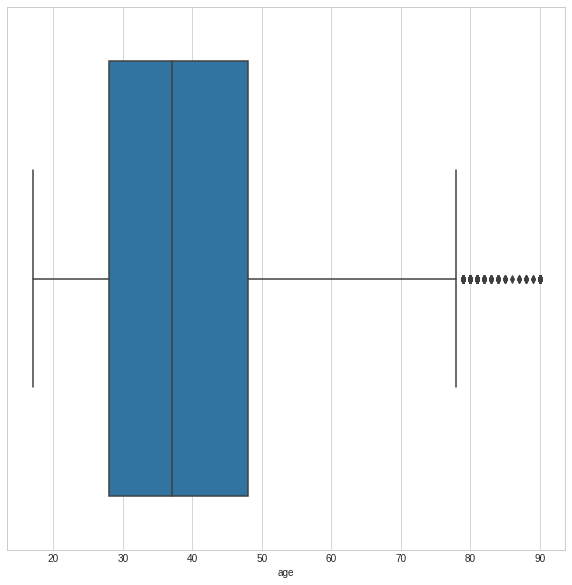

In [157]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="age", data=df)
plt.show()

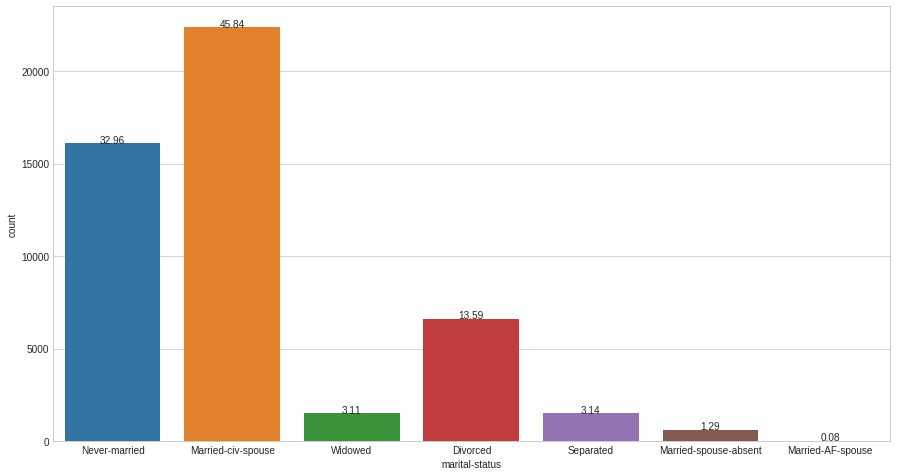

In [158]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

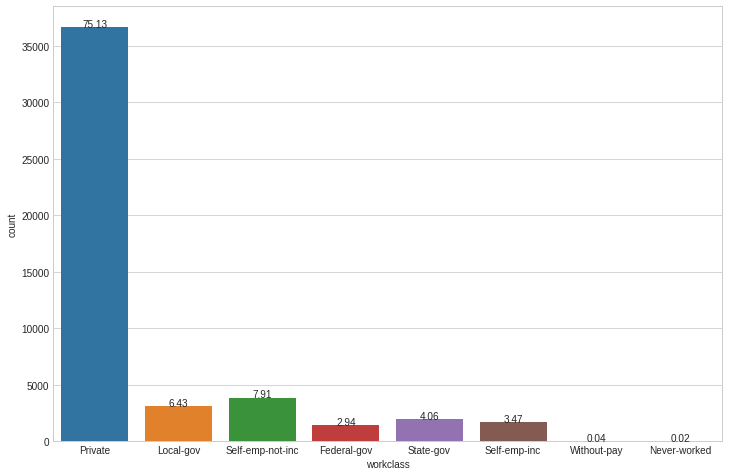

In [159]:
plt.figure(figsize=(12,8))

total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

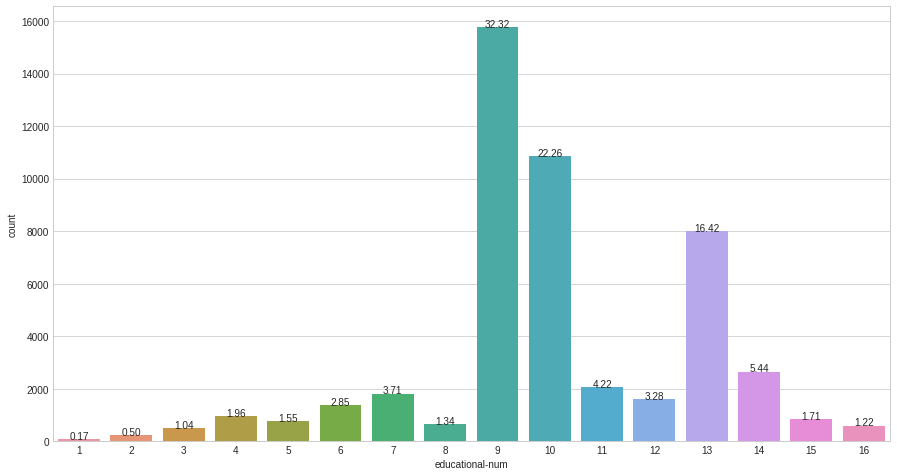

In [190]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="educational-num", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

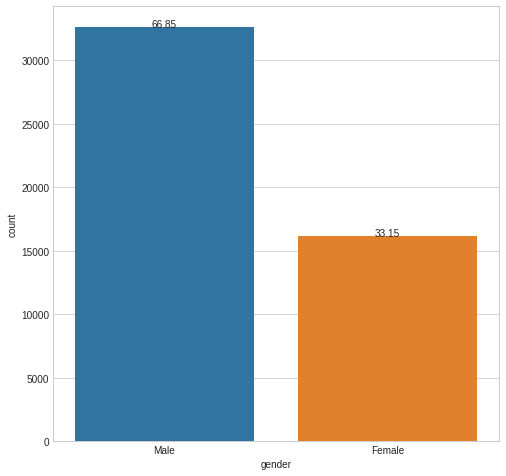

In [161]:
plt.figure(figsize=(8,8))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## **3. Correlation and Heat Maps**

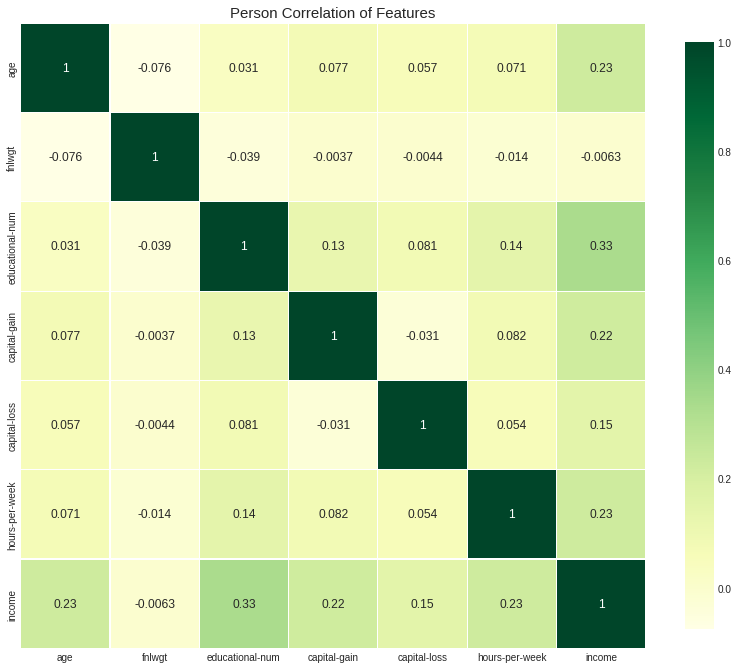

In [163]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Person Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

##**4. Multivariate Visualizations**

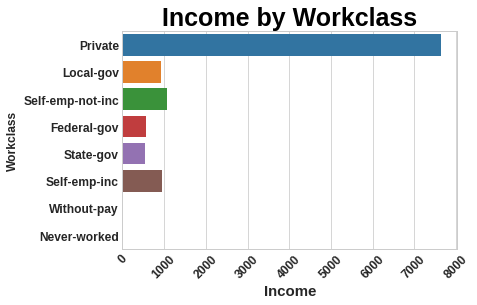

In [193]:
sns.barplot(
    x="income", 
    y="workclass", 
    data=df, 
    estimator=np.sum, 
    ci=None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Income',fontweight='bold', fontsize='15')
plt.ylabel('Workclass',fontweight='bold', fontsize='12')
plt.title('Income by Workclass',fontweight='bold', color = 'Black', fontsize='25');

The first Trend that is recognized is Income by Workclass 

- The trend is that most people are choosing to work in the Private Sector. This is most likely because the other sectors income is much lower. 
- The higest income is gained in the Private Sector.
- Government Job do not appear to pay more than the Private Sector.


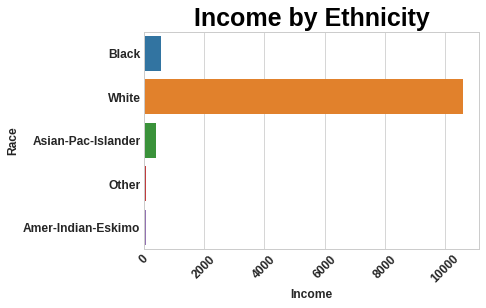

In [174]:
sns.barplot(
    x="income", 
    y="race", 
    data=df, 
    estimator=np.sum, 
    ci=None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Income',fontweight='bold', fontsize='15')
plt.ylabel('Race',fontweight='bold', fontsize='12')
plt.title('Income by Ethnicity',fontweight='bold', color = 'Black', fontsize='25');

The Second trend is ethnicity to income ratio
- The trend in this data set is that Whites are earning a higher income than any other ethnicity.
- There is a large disparity between whites and other ethnicities. 
- Black's have a higher income than Amer-Indian-Eskimo

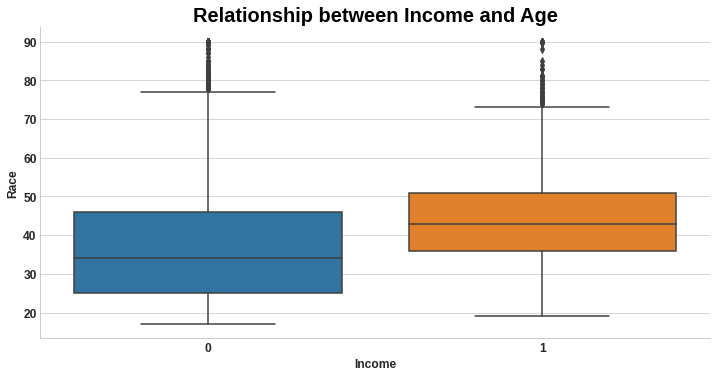

In [175]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age', fontweight = 'bold', color = 'Black', fontsize ='20')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Income',fontweight='bold', fontsize='12')
plt.ylabel('Race',fontweight='bold', fontsize='12')
plt.show()

- Most of the people having income less than or equal to 50K are between age 25-45
- Most of the people having income more than 50K are between age 37-50